In [1]:
import os
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *

No switching cost

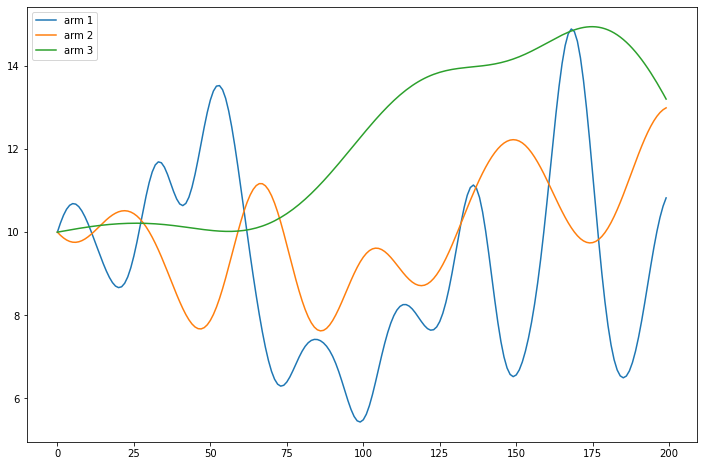

In [19]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)+10  #generate three arms
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)+10
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)+10

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [20]:
N = 100
T = 200

DTS_record=[]
UCB_record=[]
GPR_record=[]

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=16,variance=5,Smooth=True,Plot=False)
  arm3=expect_reward_generator(T,lengthscale=32,variance=5,Smooth=True,Plot=False)

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_DTS=DTS(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  DTS_record.append(regret_holder_DTS)
  UCB_record.append(regret_holder_UCB)
  GPR_record.append(regret_holder_GPR_mismatch)

100% |########################################################################|


In [21]:
DTS_record=np.array(DTS_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)


# np.savetxt('result/experiment1 data/DTS_record.csv', DTS_record, delimiter=',')
# np.savetxt('result/experiment1 data/UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('result/experiment1 data/GPR_record.csv', GPR_record, delimiter=',')

Experiment 2 

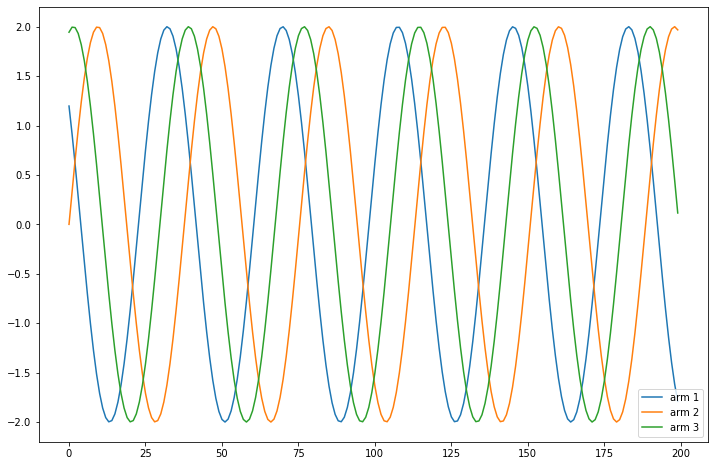

In [22]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [23]:
DTS_record=[]
UCB_record=[]
GPR_record=[]


arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,4,Plot=False)

arms=[arm1,arm2,arm3]
max_reward = np.maximum.reduce(arms)
C=np.sum(np.abs(np.maximum.reduce(arms)))

N = 100
T = 200

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_DTS=DTS(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  DTS_record.append(regret_holder_DTS)
  UCB_record.append(regret_holder_UCB)
  GPR_record.append(GPR_record)
   


100% |########################################################################|


In [26]:
DTS_record=np.array(DTS_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)

# np.savetxt('DTS_record.csv', DTS_record, delimiter=',')
# np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('GPR_record.csv', GPR_record, delimiter=',')


Switching cost is non-negative

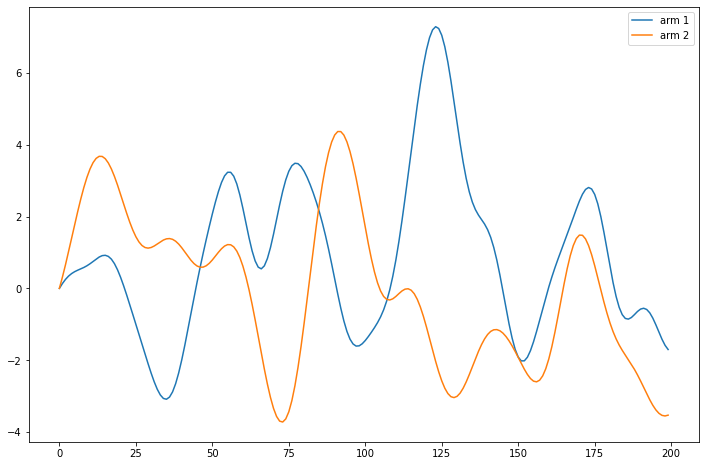

In [4]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=10,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.legend()

In [76]:
C_holder = [40]

In [3]:
for C in C_holder:
  
  regret_GPRTS = []
  regret_DPTS = []
  regret_DPPM = []

  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    #regret_holder1,_=GPR_fit(T, 'RBF',C,arm1,arm2)
    regret_holder2,_=GPR_DP(T,C, arm1,arm2, TS= True)
    # regret_holder3,_=GPR_DP(T,C, arm1,arm2, TS= False)
    

    #regret_GPRTS.append(regret_holder1/Normal)
    regret_DPTS.append(regret_holder2/Normal)
    # regret_DPPM.append(regret_holder3/Normal)
    

  #regret_record1 = np.array(regret_GPRTS).reshape(N,T)
  regret_record2 = np.array(regret_DPTS).reshape(N,T)
  # regret_record3 = np.array(regret_DPPM).reshape(N,T)

  np.savetxt('result/experiment3 data/GPRTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('result/experiment3 data/DPTS_cost'+str(C)+'.csv', regret_record2, delimiter=',')
  np.savetxt('result/experiment3 data/DPPM_cost'+str(C)+'.csv', regret_record3, delimiter=',')


 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


Experiment with discount factor

In [26]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

In [27]:
for df in discount_factor_holder:
  
  regret_GPRTS = []
  regret_DPTS = []
  regret_DPPM = []

  

  C = 10
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder1,_=GPR_fit(T, 'RBF',C, arm1,arm2) 
    regret_holder2,_=GPR_DP(T,C, arm1,arm2, discount_factor=df,TS=True)
    regret_holder3,_=GPR_DP(T,C, arm1,arm2, discount_factor=df,TS=False)
    
    regret_GPRTS.append(regret_holder1/Normal)
    regret_DPTS.append(regret_holder2/Normal)
    regret_DPPM.append(regret_holder3/Normal)
    

    
  regret_record1=np.array(regret_GPRTS).reshape(N,T)
  regret_record2=np.array(regret_DPTS).reshape(N,T)
  regret_record3=np.array(regret_DPPM).reshape(N,T)
  
  


  # np.savetxt('result/experiment4 data/ GPRTS_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment4 data/ DPTS_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment4 data/ DPPR_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |#############################################

Robust or not?

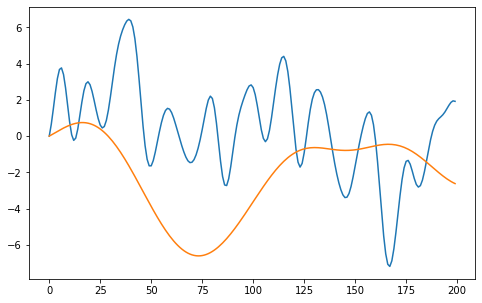

In [28]:
arm1=expect_reward_generator(T,lengthscale=5,variance=5,Smooth=True,Plot=True)
arm2=expect_reward_generator(T,lengthscale=30,variance=25,Smooth=True,Plot=True)
    

In [2]:
C_holder = [0]      #,10,30,40]

In [5]:
for C in C_holder:
  
  choice_holder1 = []
  choice_holder2 = []
  choice_holder3 =[]
  
  regret_holder1 = []
  regret_holder2 = []
  regret_holder3 =[]
  
  N = 250


  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=5,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=30,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    #regret1,choice1=GPR_DP(T,C, arm1,arm2,TS=True)
    egret2,choice2=GPR_DP(T,C, arm1,arm2,TS=False)
    #regret3,choice3 = GPR_fit(T, 'Matern52', C, arm1, arm2)
    
    #choice_holder1.append(choice1)
    choice_holder2.append(choice2)
    
    # regret_holder1.append(regret1/Normal)
    # regret_holder2.append(regret2/Normal)
    #choice_holder3.append(choice3)
    #regret_holder3.append(regret3/Normal)
  
  
    
  #choice_record1 = np.array(choice_holder1).reshape(N,T)  
  choice_record2 = np.array(choice_holder2).reshape(N,T)  
  #choice_record3 = np.array(choice_holder3).reshape(N,T)  
  #regret_record3 = np.array(regret_holder3).reshape(N,T) 
  
      
  # regret_record1 = np.array(regret_holder1).reshape(N,T)  
  # regret_record2 = np.array(regret_holder2).reshape(N,T) 
  
  #np.savetxt('choice_GPRTS_cost'+str(C)+'.csv', choice_record3, delimiter=',')
  # np.savetxt('regret_GPRTS_cost'+str(C)+'.csv', regret_record3, delimiter=',')
  
    
  #np.savetxt('choice_DPTS_cost'+str(C)+'.csv', choice_record1, delimiter=',')
  # np.savetxt('choice_DPPM_cost'+str(C)+'.csv', choice_record2, delimiter=',')
  # np.savetxt('regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  # np.savetxt('regret_DPPM_cost'+str(C)+'.csv', regret_record2, delimiter=',')
  #np.savetxt('GPRTS_cost'+str(C)+'.csv', choice_record3, delimiter=',')
  


100% |########################################################################|


In [6]:
print(round(100*np.sum(choice_record2)/(N*T),4))

59.102


In [17]:
print(round(100*np.sum(choice_record2)/(N*T),4))

60.81


In [14]:
print(round(100*np.sum(choice_record1)/(N*T),4))
print(round(100*np.sum(choice_record2)/(N*T),4))

50.318
57.668


In [7]:
np.mean(0+(arm1>arm2))

0.205

In [18]:
  np.savetxt('regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('regret_DPPM_cost'+str(C)+'.csv', regret_record2, delimiter=',')

In [ ]:
  np.savetxt('choice_DPTS_cost'+str(C)+'.csv', choice_record1, delimiter=',')
  np.savetxt('DPPM_cost'+str(C)+'.csv', choice_record2, delimiter=',')

In [14]:
print(round(100*np.sum(choice_record1)/(N*T),4))
print(round(100*np.sum(choice_record2)/(N*T),4))

50.16
51.442


In [4]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'choice_GPRTS_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record1)/(N*T),4))

51.21


In [5]:
C

40

In [85]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'choice_DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record1)/(N*T),4))

50.41


In [84]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'choice_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record1)/(N*T),2))

53.12


In [67]:
import numpy as np
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import os
import math
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.75)

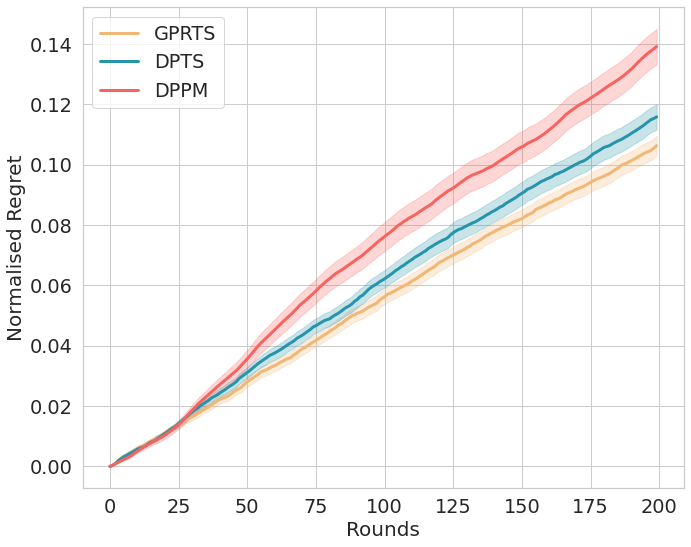

In [80]:
N = 250
T = 200


regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'regret_GPRTS_cost0.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'regret_DPTS_cost0.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'regret_DPPM_cost0.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPTS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPPM',color='#fa625f',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3,color='#fa625f', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 0')
plt.legend()
#plt.savefig('SC40.png')

In [17]:
for C in C_holder:

    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment5 data/DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record2)/(N*T),2))

56.75
59.53
61.0
58.31
59.9
65.22
67.56
80.31
93.54


1  0 0.8 0.6 0.2 0.1

In [9]:
control_holder = [0.5,0.4,0.3]

In [10]:
for ctrl in control_holder:
    
    T = 200
    C = 0.75
    N = 250

        
    regret_holder = []
    choice_holder = []


    pbar = ProgressBar() #showing the progress of the code
    for exp in pbar(range(N)):

        arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
        arm2=expect_reward_generator(200,lengthscale=10,variance=5,Smooth=True,Plot=False)
        
        Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

        regret,choice = GPR_generalTS2(T,C, arm1,arm2,control=ctrl)
        
        regret_holder.append(regret/Normal)
        choice_holder.append(choice)
        
    regret_record = np.array(regret_holder).reshape(N,T)  
    choice_record = np.array(choice_holder).reshape(N,T)  

    np.savetxt('GeneralTS_SC0.75_control'+str(ctrl)+'.csv', regret_record, delimiter=',')
    np.savetxt('choice_GeneralTS_SC0.75_control'+str(ctrl)+'.csv', choice_record, delimiter=',')
    
    
    

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Text(0.5, 1.0, 'switching cost = 0.75')

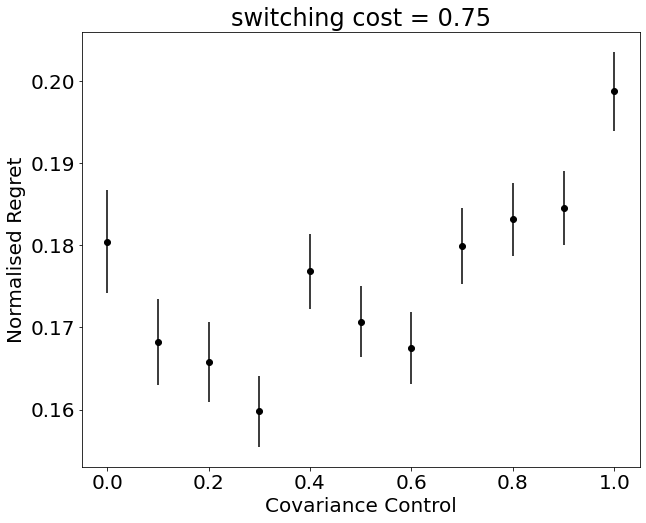

In [11]:
control_holder = [1,0.9,0.8,0.7,0.6, 0.5, 0.4, 0.3, 0.2,0.1,0]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for ctrl in control_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'GeneralTS_SC0.75_control'+str(ctrl)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(ctrl, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='DPTS')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Covariance Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
   
            
plt.title('switching cost = 0.75')
#plt.savefig('plots/SC10_discount.png')